## Purpose of this notebook will be a quick test if we can load the masks from the ASTE 90 grid

In [1]:
# path for the masks is at /scratch/atnguyen/aste_90x150x60/run_template/input_maskTransport/

# IMPORTANT NOTE HERE THIS RUN ALL IS LOADING FOR ASTE 270 BUT WE LATER RESET THE GRID TO ASTE 90

# auto-reload edited modules
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, "/home/mmurakami/crios_backups/an_helper_functions")

# run the script into the current kernel (vars/functions become available)
%run -i "/home/mmurakami/crios_backups/an_helper_functions/load_packages.py"

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



In [2]:
dirroot = "/scratch3/atnguyen/aste_90x150x60/"
dirgrid = dirroot + "GRID_real8/"
dirgridnb = dirroot + "GRID_noblank/"
runstr= "run_c68v_heffmosm3x_layers_lessmem1_viscAHp5em2_it0000_pk0000000001/"
layers_path = dirroot + runstr
extL = "LAYERS"
dirmask = dirroot + "run_template/input_maskTransport/"
dirdiags = layers_path + "diags/BUDG/"
dirstate = layers_path + "diags/STATE/"

In [3]:
# set the parameters for the aste 90 grid
nx = 90
ncut1 = 150
ncut2 = 60
ny = 2*ncut1 + nx + ncut2
nz = 50
nfx = np.array([nx,0,nx,ncut2,ncut1])
nfy = np.array([ncut1, 0, nx,nx,nx])

In [4]:
# remake hf1 here just to check

nx = 90
ncut1 = 150
ncut2 = 60
ny = 2*ncut1+nx+ncut2   # this is 450
nz = 50
nfx = np.array([nx, 0 , nx, ncut2 ,ncut1])
nfy = np.array([ncut1, 0 , nx, nx, nx])

mygrid = {
    'dirGrid': dirgrid,
    'nFaces': 5,
    'fileFormat': 'compact',
    'memoryLimit': 2,
    'ioSize': [nx*ny, 1],
    'facesSize': [ny, nx],
    'facesExpand': [ny, nx],
    'missVal': 0,
}

fldstr2d = ['XC','YC','RAC','Depth','maskInC','DXG','DYG'] #  ,'DXG','DYG','DXC','DYC'] # 'XG','YG'
fldstr3d = ['hFacC'] #,'hFacW','hFacS','mskC','mskS','mskW']
fldstr3dp = ['hFacC'] # ,'hFacW','hFacS','maskCtrlC','maskCtrlS','maskCtrlW']
fldstr1d = ['RC','DRF','RF'] # ,'RF','DRC',

for fld in fldstr1d:
    mygrid[fld] = np.squeeze(rdmds(os.path.join(dirgrid, fld)))

for fld in fldstr3d:
    temp = rdmds(os.path.join(dirgrid, fldstr3dp[fldstr3d.index(fld)]))
    mygrid[fld] = temp.reshape(nz, ny, nx)

for fld in fldstr2d:
    temp = rdmds(os.path.join(dirgrid, fld))
    mygrid[fld] = temp.reshape(ny, nx)

# mygrid['mskC'][mygrid['mskC'] == 0] = np.nan
RAC = mygrid['RAC']
mskC = mygrid['maskInC']

In [5]:
hf1 = mygrid['hFacC'][0] # top layer in z
hf1.shape

(450, 90)

## copy the code for looking at the masks from the ASTE 270 grid

I assume this will be very similar

In [6]:
# THIS IS WRONG

# # copy basin listing from lookat_layers
# fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
# extBasin='run_template/input_maskTransport/'
# filename = fileprefix + extBasin + "GATE_transports_v2.mat"
# if nx == 270:
#     inf = loadmat(filename)
#     mskBasin = (inf["mskBasin"])

# mskBasin = mskBasin.T               # python adjustment

In [7]:
# try to use rdmds
fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
extBasin='run_template/input_maskTransport/'
filename = fileprefix + extBasin + "GATE_transports_v2_mskBasin.bin"
ind = np.fromfile(filename, dtype=np.int32)  # auto-reads .meta for shape/dtype/order
print(ind.shape)

(40500,)


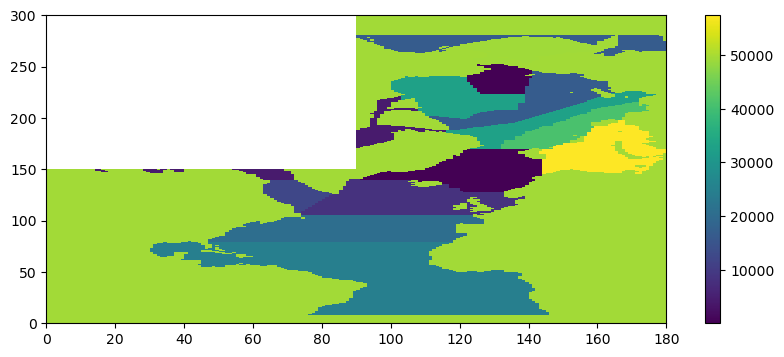

In [8]:
ind = ind.reshape(ny,nx)
plt.pcolormesh(get_aste_tracer(ind,nfx,nfy)[0])
# plt.xlim(140,180)
# plt.ylim(130,220)
plt.colorbar()

In [9]:
landmsk = np.zeros((ny,nx))
landmsk[hf1 == 0] = 1
landmsk[hf1 == 1] = np.nan

In [10]:
mymsk = np.full((ny,nx),np.nan)
mymsk[ind == 57408.0] = 1

# make this smaller
mymsk[:,27:50] = np.nan
mymsk[:160,12:30] = np.nan
mymsk[160:163,15:30] = np.nan

(140.0, 200.0)

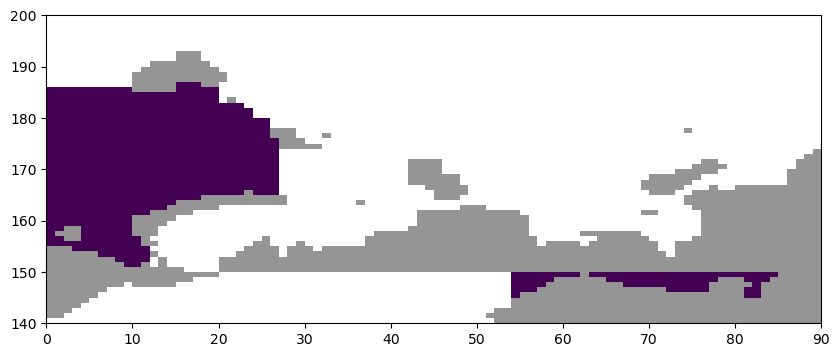

In [11]:
plt.pcolormesh(mymsk)
plt.pcolormesh(landmsk,cmap="Greys",vmin=-2,vmax=4)
plt.ylim(140,200)

(130.0, 210.0)

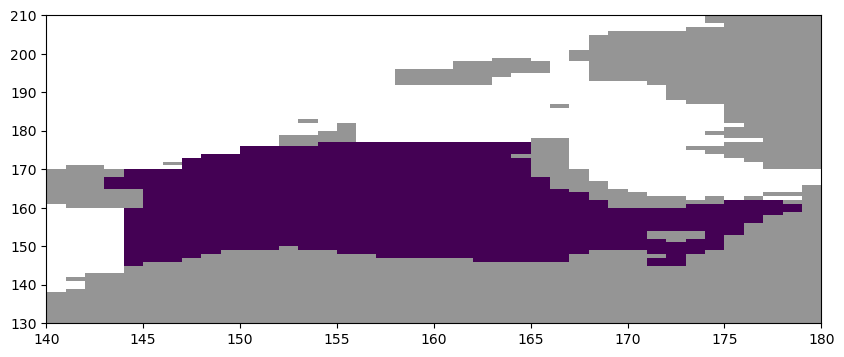

In [12]:
plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])
plt.pcolormesh(get_aste_tracer(landmsk,nfx,nfy)[0],cmap="Greys",vmin=-2,vmax=4)

plt.xlim(140,180)
plt.ylim(130,210)

In [13]:
## redefine the gates based on the edges of this and plot these as well

## I'm not sure if it would be easier (probably) to define a smaller box to begin with just because of the SFJ-FJ gateway

# y_bso,x_bso = np.arange(

## Load the LAYERS terms for the mask here and plot ADV

In [14]:
ffac=1e-6
G_T=np.array([])
metaT=parsemeta(layers_path + "diags/LAYERS/layers_3d_Ttend." + "0000000003" + ".meta")
nFldsT = metaT["fldList"]
print(len(nFldsT))
setTtend=nFldsT.copy()
fldsIwant = np.array(['LaTh2TH','LaTz2TH'])


# check for the correct diagnostics
metaT['fldList']   # 13, 14, 15, 16, 19, 22
b = metaT['fldList']
ifldT = np.array([1,2])    # surf, hDiff, vDiff, hADV, vADV, total tend
# print(np.array(b)[ifldT])  # for G_T

# remake the following to look for the existing terms and see if we can recreate
# ['LaTs2TH' 'LaTh2TH' 'LaTz2TH' 'LTha2TH' 'LTza2TH' 'LTto2TH']
ifldT = np.array([0,1,2,7,8,11])
print(np.array(b)[ifldT])  # for G_T

24
['LaTs2TH' 'LaTh2TH' 'LaTz2TH' 'LTha2TH' 'LTza2TH' 'LTto2TH']


In [15]:
# we want LTha2TH for the horizontal ADV and LTza2TH for the vertical ADV

In [16]:
filename = "layers2TH"
boundsT = rdmds(layers_path + filename)
binsTH_edges = boundsT.reshape(boundsT.shape[0])
binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
nT = binsTH_edges.shape[0]-1

filename = "layers1SLT"
boundsS = rdmds(layers_path + filename)
binsSLT_edges = boundsS.reshape(boundsS.shape[0])
binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
nS = binsSLT_edges.shape[0]-1

binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]

binwidthT1 = (binwidthT[:-1] + binwidthT[1:])/2
binwidthS1 = (binwidthS[:-1] + binwidthS[1:])/2

binmidT = ((boundsT[:-1] + boundsT[1:])/2).reshape(nT)
binmidS = ((boundsS[:-1] + boundsS[1:])/2).reshape(nT)

In [17]:
# 2d
rac2d = read_float64(dirgrid + "RAC" + ".data")
print("RAC2d",rac2d.shape)

drf3d = read_float32(dirgrid + "DRF" + ".data")


rac2dtile = np.tile(rac2d,(nT-1,1)) #.shape

hf1flat = np.reshape(hf1,hf1.flatten().shape[0])
hf2d = hf1flat

hf2dtile = np.tile(hf2d,(nT-1,1))
ffac = 1e-6

RAC2d (40500,)
(100,)


In [18]:
# we're not using iWetC2d because I'm not sure where this went for the ASTE 90 grid
ts = "0000000003"
tsstr = np.array([ts])

In [19]:
# we need to make the barents sea mask in the shape of ind

In [20]:
# make the G_T term
G_T = {}
G_T["all"] = {}
    
# now loop through
G_T["all"][ts] = {}
for i in range(len(ifldT)-1, -1, -1):
    tmp = read_float64_skip(layers_path + "diags/LAYERS/layers_3d_Ttend." + tsstr[-1] + ".data", nx*ny*(nT-1),ifldT[i])
    tmp = np.reshape(tmp,(nT-1,nx*ny))

    # here we will want to multiply by the mask for the Barents Sea
    tmp = tmp * (rac2dtile * hf2dtile) #* ffac

    if i == ifldT.shape[0]-1:
        # if LTto2TH, do not remove from residual
        residT = tmp
    else:
        # else if vADV, hADV, vDiff, hDiff, surface, remove from residual
        residT = residT-tmp
    
    # just do the Barents Sea for this one
    a = np.nansum(tmp,axis=1)
    G_T["all"][ts][setTtend[ifldT[i]]] = a

G_T["all"][ts]["residT"] = np.nansum(residT,axis=1)

Text(0, 0.5, 'G_T ADVr m^3/s')

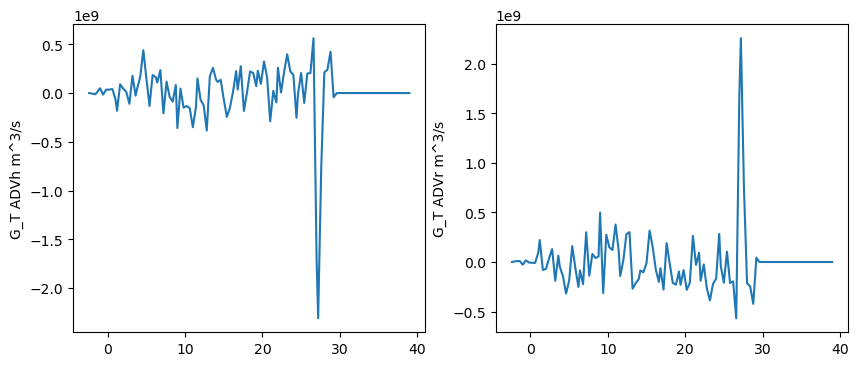

In [21]:
# plot this as a line graph with the T bins
GADVh = G_T["all"][ts]['LTha2TH']
GADVr = G_T["all"][ts]['LTza2TH']

fig = plt.figure()

ax = plt.subplot(121)
ax.plot(boundsT.flatten()[1:-1],GADVh)
ax.set_ylabel("G_T ADVh m^3/s")


ax = plt.subplot(122)
ax.plot(boundsT.flatten()[1:-1],GADVr)
ax.set_ylabel("G_T ADVr m^3/s")

In [22]:
# let's start with this and plot the overall ADV g term first

In [23]:
# make sure we get the dt correct
# create an array of the time steps we want to read
# use ts2dte to get december 2014
# first make an array of filenames
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = np.array([2.,3.])


dt = ts2dte(fnames[1])-ts2dte(fnames[0])  # days
dt = dt.total_seconds()
dt

1200.0

In [24]:
tsstr = np.array(['0000000002','0000000003'])
t2 = int(tsstr[1])

In [25]:
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["ADVx_TH","ADVy_TH"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVx_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
ADVy_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[1])

# now 3d zfluxes
file_name = "budg3d_zflux_set1"
meta_budg3d_zflux_set1 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_zflux_set1["fldList"])
varnames = np.array(["ADVr_TH"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVr_TH,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
ADVr_TH = ADVr_TH.reshape(nz,ny,nx)

In [26]:
hf = mygrid['hFacC']

ADV_hconv = calc_UV_conv_mod(nfx, nfy,get_aste_faces(ADVx_TH.reshape(nz, ny, nx), nfx, nfy),get_aste_faces(ADVy_TH.reshape(nz, ny, nx), nfx, nfy))
ADV_hconv = ADV_hconv * hf   # degC·m^3/s at cell centers (matches: ff.DFh = ff.DFh .* hf)
ADVh = ADV_hconv

trWtopADV = -(ADVr_TH)

ADVr = np.zeros((nz,ny,nx),dtype=float)
ADVr[:-1,:,:] = (trWtopADV[:-1] - trWtopADV[1:])  # this is not the way we did it in the original code but this is the way An has done it so we try

In [27]:
# we need to also create the theta and salt bins for this area

# 'diags/state_3d_set1'
# read theta and salt averages from the t2 timestep (average)
file_name = "state_3d_set1"
meta_state_3d_set1 = parsemeta(dirstate + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_state_3d_set1["fldList"])
varnames = np.array(["THETA","SALT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
THETA,its,meta = rdmds(os.path.join(dirstate, file_name),t2,returnmeta=True,rec=recs[0])
SALT,its,meta = rdmds(os.path.join(dirstate, file_name),t2,returnmeta=True,rec=recs[1])

THETA = THETA.reshape(nz,ny,nx) * hf
SALT = SALT.reshape(nz,ny,nx)

In [28]:

def bin_dF_by_theta(THETA, boundsT, DFh, DFr):
    """
    Replicates the MATLAB loop:
      for i=1:nT
        ij = find(T >= boundsT(i) & T < boundsT(i+1));
        Lij(i)        = length(ij);
        dF_Tcenter(2,i) = sum(DFh(ij));   % degC m^3/s
        dF_Tcenter(3,i) = sum(DFr(ij));   % degC m^3/s
      end
    but using THETA (3D) instead of T, and handling NaNs like MATLAB:
    if any DFh/DFr in a bin are NaN, the sum for that bin is NaN.

    Parameters
    ----------
    THETA  : ndarray (3D or any shape) — binning variable, may contain NaNs
    boundsT: (N+1,)  array of bin edges
    DFh    : ndarray same shape as THETA (degC m^3/s), may contain NaNs
    DFr    : ndarray same shape as THETA (degC m^3/s), may contain NaNs

    Returns
    -------
    Lij      : (N,) int    counts per bin (based on THETA only)
    dFh_bin  : (N,) float  sum of DFh in each bin (NaN if any DFh in bin is NaN)
    DFr_bin  : (N,) float  sum of DFr in each bin (NaN if any DFr in bin is NaN)
    """
    THETA   = np.asarray(THETA)
    boundsT = np.asarray(boundsT)
    DFh     = np.asarray(DFh)
    DFr     = np.asarray(DFr)

    nT = boundsT.size - 1

    # Flatten for vectorized binning
    theta = THETA.ravel()
    dfh   = DFh.ravel()
    dfr   = DFr.ravel()

    # Bin indices for [lower, upper) using np.digitize(..., right=False)
    bin_idx = np.digitize(theta, boundsT, right=False) - 1

    # Valid THETA: finite and within bin range
    valid_theta = np.isfinite(theta) & (bin_idx >= 0) & (bin_idx < nT)
    idx = bin_idx[valid_theta]

    # Lij = count of THETA in each bin (regardless of DFh/DFr NaNs)
    Lij = np.bincount(idx, minlength=nT)

    # ----- DFh sums with MATLAB-like NaN propagation -----
    vals_h = dfh[valid_theta]
    nan_h  = np.isnan(vals_h)

    # Sum the non-NaN values
    sum_h = np.bincount(idx[~nan_h], weights=vals_h[~nan_h], minlength=nT).astype(float)

    # If any NaN occurred in a bin, set that bin's sum to NaN
    any_nan_h = np.bincount(idx[nan_h], minlength=nT) > 0
    sum_h[any_nan_h] = np.nan
    dFh_bin = sum_h

    # ----- DFr sums with MATLAB-like NaN propagation -----
    vals_r = dfr[valid_theta]
    nan_r  = np.isnan(vals_r)

    sum_r = np.bincount(idx[~nan_r], weights=vals_r[~nan_r], minlength=nT).astype(float)
    any_nan_r = np.bincount(idx[nan_r], minlength=nT) > 0
    sum_r[any_nan_r] = np.nan
    DFr_bin = sum_r

    return Lij, dFh_bin, DFr_bin

In [31]:
def _bincount_sum_with_nan(idx, values, n_bins):
    """MATLAB-like sum: if any NaN in a bin, that bin's sum is NaN."""
    idx = np.asarray(idx)
    values = np.asarray(values)
    ok = np.isfinite(values)
    s = np.bincount(idx[ok], weights=values[ok], minlength=n_bins).astype(float)
    any_nan = np.bincount(idx[~ok], minlength=n_bins) > 0
    s[any_nan] = np.nan
    return s

In [32]:
# do this with interpolating to the edge theta
ADVh[np.isnan(ADVh)] = 0
ADVr[np.isnan(ADVr)] = 0

Lij, adv_hconv_binned, adv_rconv_binned = bin_dF_by_theta(THETA, boundsT[:,0,0], ADVh, ADVr)


# --- Move to edges by averaging adjacent centers ---
ADV_TedgeH = 0.5 * (adv_hconv_binned[:-1] + adv_hconv_binned[1:])   # move to the edge beceause this is already an integral

G_T_offline = ADV_TedgeH / binwidthT1

In [33]:
# do it again the way the function below does it
DFh = np.asarray(ADVh)
nT   = boundsT.flatten().size - 1
nTm1 = nT - 1
theta_flat = THETA.ravel()
dfh_flat   = DFh.ravel()
bin_idx_mid = np.digitize(theta_flat, binmidT, right=False) - 1
valid_mid   = (bin_idx_mid >= 0) & (bin_idx_mid < nTm1) & np.isfinite(theta_flat)
idx_mid     = bin_idx_mid[valid_mid]

DFh_new = _bincount_sum_with_nan(idx_mid, dfh_flat[valid_mid], nTm1)
G_off_new_h = DFh_new / binwidthT1

Text(0.5, 1.0, 'Without interp to edges after binning')

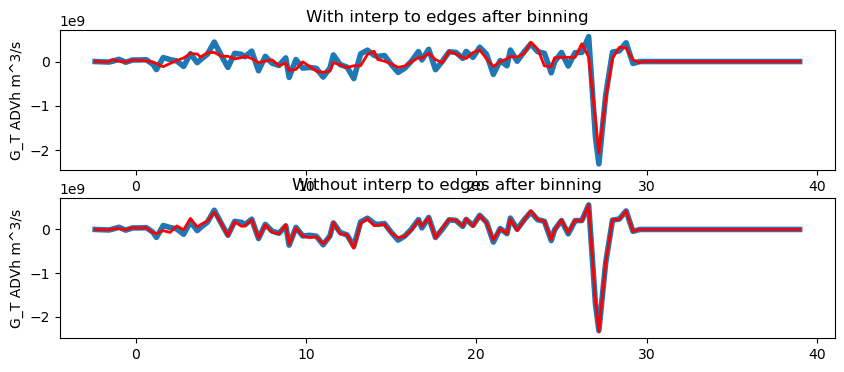

In [34]:
fig = plt.figure()

ax = plt.subplot(211)
ax.plot(boundsT.flatten()[1:-1],GADVh,linewidth=4, label='online')
ax.plot(boundsT.flatten()[1:-1], G_T_offline, 'r-', linewidth=2, label='offline')
ax.set_ylabel("G_T ADVh m^3/s")
ax.set_title("With interp to edges after binning")

ax = plt.subplot(212)
ax.plot(boundsT.flatten()[1:-1],GADVh,linewidth=4, label='online')
ax.plot(boundsT.flatten()[1:-1], G_off_new_h, 'r-', linewidth=2, label='offline')
ax.set_ylabel("G_T ADVh m^3/s")
ax.set_title("Without interp to edges after binning")


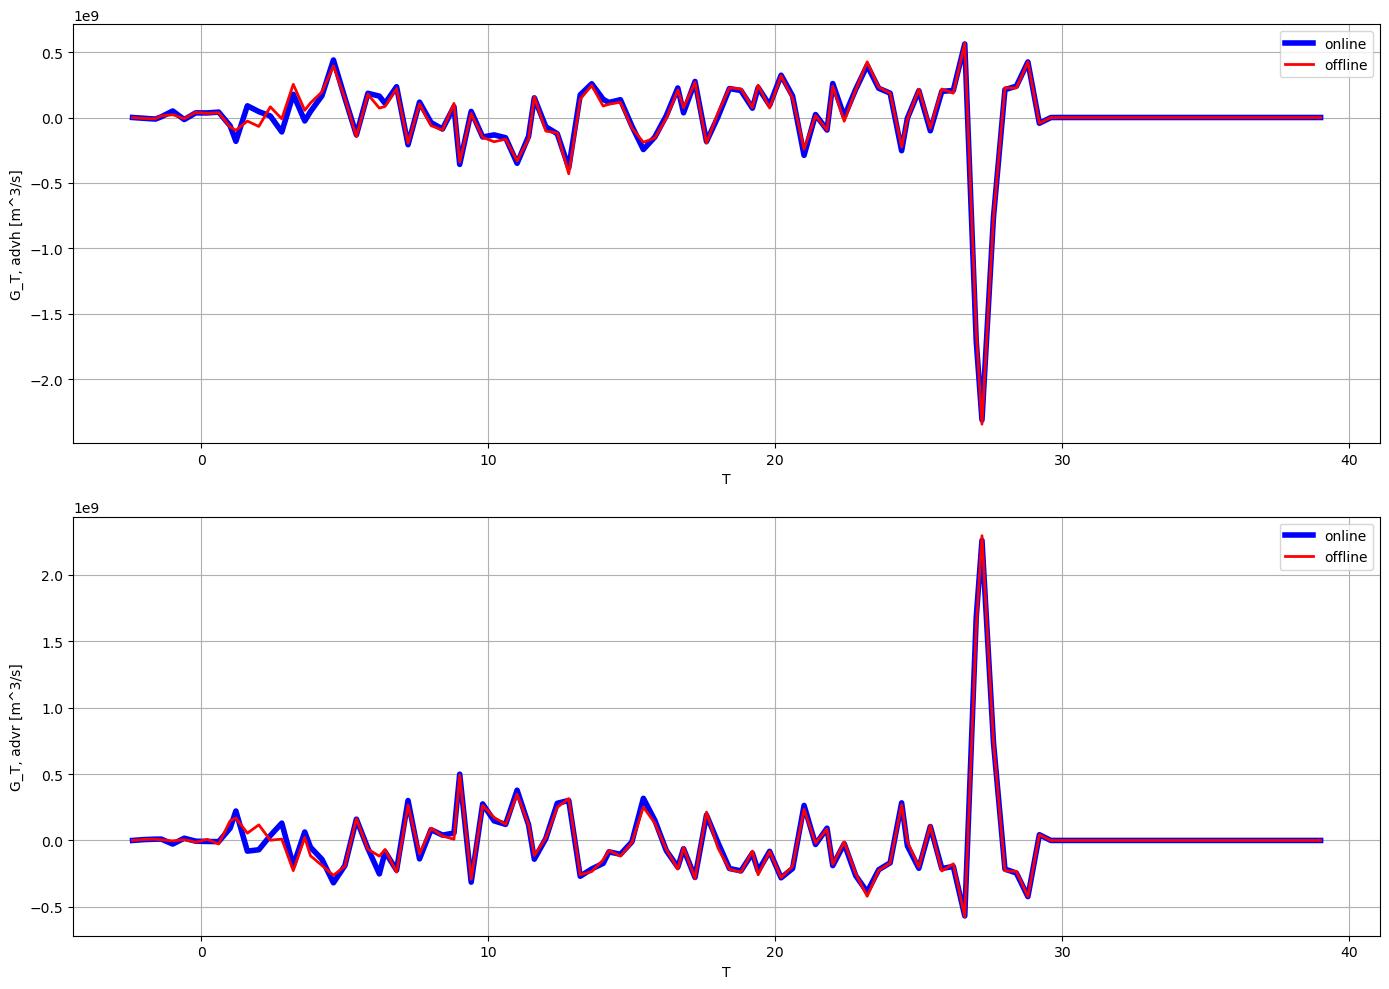

In [31]:


def plot_figure4_new(THETA, DFh, DFr, boundsT, binmidT, binwidthT1,
                     h_diff_layers, r_diff_layers, iiT=None):
    """
    Recreates Figure 4 (both panels) from replicate_layers_offline:
      Top:  G_T diffh — online vs offline(new)
      Bottom: G_T diffr — online vs offline(new)
    """
    # --- inputs & shapes ---
    THETA      = np.asarray(THETA)
    DFh        = np.asarray(DFh)
    DFr        = np.asarray(DFr)
    boundsT    = np.asarray(boundsT)
    binmidT    = np.asarray(binmidT)
    binwidthT1 = np.asarray(binwidthT1)      # length nT-1
    G_online_h = np.asarray(h_diff_layers)   # length nT-1
    G_online_r = np.asarray(r_diff_layers)   # length nT-1

    nT   = boundsT.size - 1
    nTm1 = nT - 1

    # x-locations for edge-based curves (length nTm1)
    x = boundsT[1:-1]

    # --- "new" interpretation: bin by binmidT intervals ---
    theta_flat = THETA.ravel()
    dfh_flat   = DFh.ravel()
    dfr_flat   = DFr.ravel()

    # binmidT[i] <= THETA < binmidT[i+1], i=0..nT-2
    bin_idx_mid = np.digitize(theta_flat, binmidT, right=False) - 1
    valid_mid   = (bin_idx_mid >= 0) & (bin_idx_mid < nTm1) & np.isfinite(theta_flat)
    idx_mid     = bin_idx_mid[valid_mid]

    # per-bin sums with NaN-propagation
    DFh_new = _bincount_sum_with_nan(idx_mid, dfh_flat[valid_mid], nTm1)
    DFr_new = _bincount_sum_with_nan(idx_mid, dfr_flat[valid_mid], nTm1)

    # edge-based G (m^3/s): divide by edge binwidths
    G_off_new_h = DFh_new / binwidthT1
    G_off_new_r = DFr_new / binwidthT1

    # selection
    if iiT is None:
        iiT = slice(None)

    # --- plot: 2 rows, 1 column ---
    plt.figure(figsize=(14, 10))
    # Top: diffh
    plt.subplot(2, 1, 1)
    plt.plot(x[iiT], G_online_h[iiT], 'b-', linewidth=4, label='online')
    plt.plot(x[iiT], G_off_new_h[iiT], 'r-', linewidth=2, label='offline')
    plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, advh [m^3/s]')
    plt.legend(); plt.axis('tight')

    # Bottom: diffr
    plt.subplot(2, 1, 2)
    plt.plot(x[iiT], G_online_r[iiT], 'b-', linewidth=4, label='online')
    plt.plot(x[iiT], G_off_new_r[iiT], 'r-', linewidth=2, label='offline')
    plt.grid(True); plt.xlabel('T'); plt.ylabel('G_T, advr [m^3/s]')
    plt.legend(); plt.axis('tight')

    plt.tight_layout()

# Example:
plot_figure4_new(THETA, ADVh, ADVr, boundsT.flatten(), binmidT.flatten(), binwidthT1,
                               GADVh, GADVr, iiT=None)
plt.show()


## Let's try to compare this with the whole Barents Sea first just to see what it looks like

I want to make sure before I move to the smaller mask that these are in fact the same

In [35]:
# we can just use the whole preset BarentsS mask that An has done

# try to use rdmds
fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
extBasin='run_template/input_maskTransport/'
filename = fileprefix + extBasin + "GATE_transports_v2_mskBasin.bin"
ind = np.fromfile(filename, dtype=np.int32)  # auto-reads .meta for shape/dtype/order
orig_shape = (ind.shape)

ind2d = ind.reshape(ny,nx)

mymsk = np.full((ny,nx),np.nan)
mymsk[ind2d == 57408.0] = 1   # this is the whole Barents/Kara Seas

In [36]:
mymsk_1d = mymsk.reshape(orig_shape, order='C')

print(ind.shape, mymsk_1d.shape)  # both should be (40500,)

(40500,) (40500,)


In [37]:
mymsk_1dtile = np.tile(mymsk_1d[np.newaxis,:],(nT-1,1))


In [38]:
# load the G_T terms again with the mask in mind
# this will be a width 1 list

# make the G_T term
G_T["BarentsS"] = {}
    
# now loop through
G_T["BarentsS"][ts] = {}
for i in range(len(ifldT)-1, -1, -1):
    tmp = read_float64_skip(layers_path + "diags/LAYERS/layers_3d_Ttend." + tsstr[-1] + ".data", nx*ny*(nT-1),ifldT[i])
    tmp = np.reshape(tmp,(nT-1,nx*ny))

    # here we will want to multiply by the mask for the Barents Sea
    tmp = tmp * mymsk_1dtile * (rac2dtile * hf2dtile) #* ffac

    if i == ifldT.shape[0]-1:
        # if LTto2TH, do not remove from residual
        residT = tmp
    else:
        # else if vADV, hADV, vDiff, hDiff, surface, remove from residual
        residT = residT-tmp
    
    # just do the Barents Sea for this one
    a = np.nansum(tmp,axis=1)
    G_T["BarentsS"][ts][setTtend[ifldT[i]]] = a

G_T["BarentsS"][ts]["residT"] = np.nansum(residT,axis=1)

In [39]:
# now compare this to the overall ADV convergence (these will match)

# we first need to multiply the ADVh and ADVr by the mask we just made
ADVh_small = ADVh * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))
ADVr_small = ADVr * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))
ADVh_small[np.isnan(ADVh_small)] = 0
ADVr_small[np.isnan(ADVr_small)] = 0

# ADVh_small

In [40]:
# also define the other arrays from layers
GADVh = G_T["BarentsS"][ts]['LTha2TH']
GADVr = G_T["BarentsS"][ts]['LTza2TH']

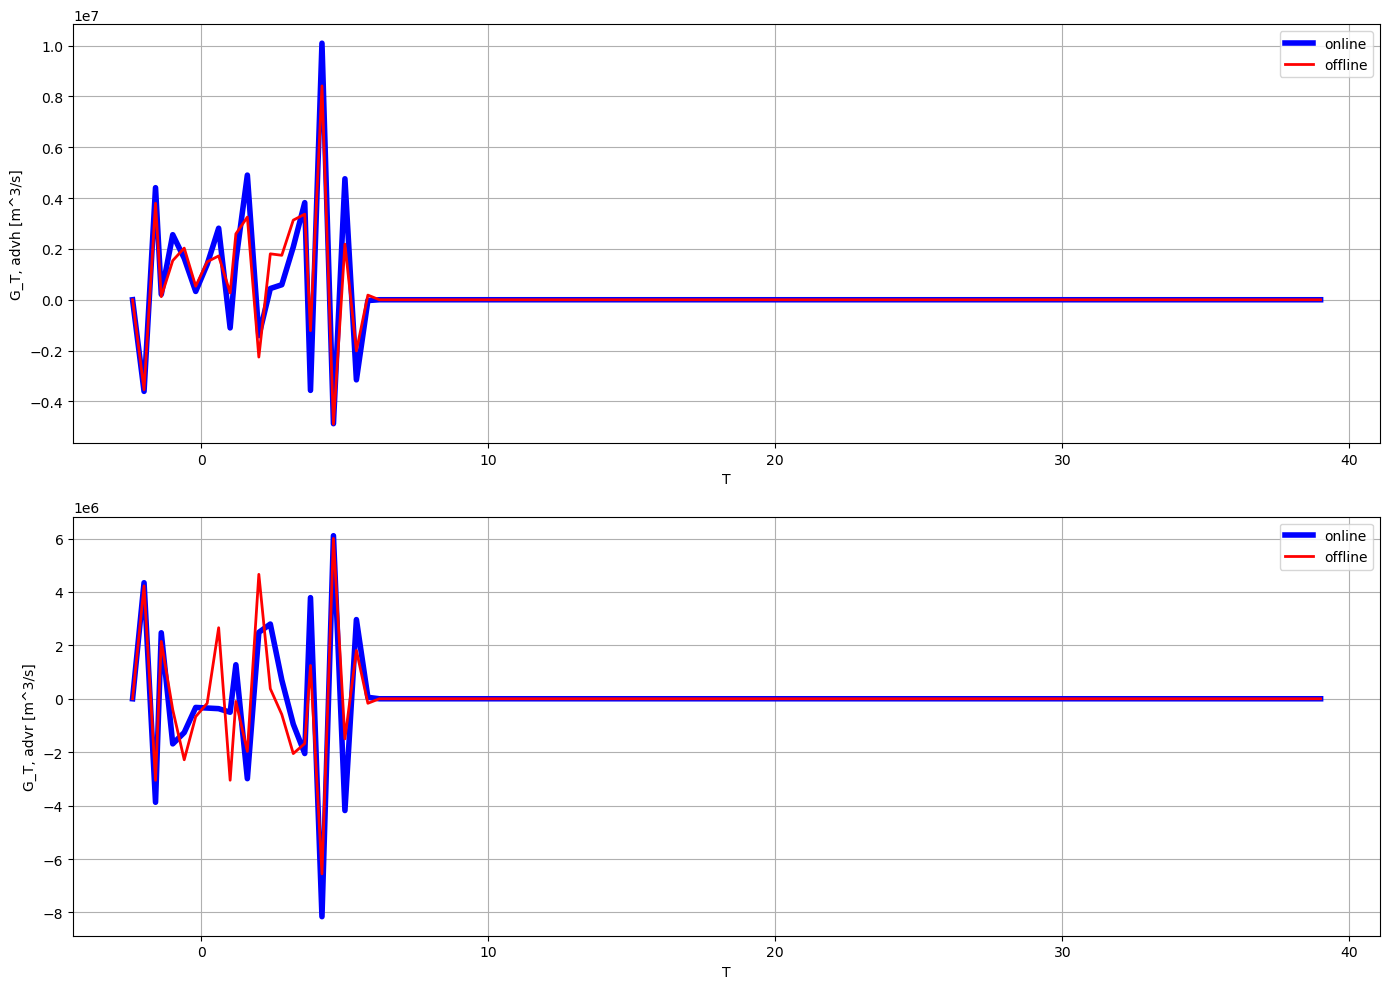

In [41]:
plot_figure4_new(THETA, ADVh_small, ADVr_small, boundsT.flatten(), binmidT.flatten(), binwidthT1,
                               GADVh, GADVr, iiT=None)
plt.show()

In [42]:
# so yes, they are basically the same but we still have these lingering errors between -1 and 5 degrees
# I will ask An today if these might become a problem in the Barents Sea as we go along
# I am fairly certain this is how things are meant to be done, though, so will continue with this line of reasoning.

## Now we need to define the gateway indices and see if we can achieve the same term as the previous ADVhconv

In [43]:
# first check on the mask itself, we need to mask the ind in layers with the Barents Sea to check that one

In [44]:
# try to use rdmds
fileprefix = "/scratch3/atnguyen/aste_90x150x60/"
extBasin='run_template/input_maskTransport/'
filename = fileprefix + extBasin + "GATE_transports_v2_mskBasin.bin"
ind = np.fromfile(filename, dtype=np.int32)  # auto-reads .meta for shape/dtype/order
orig_shape = (ind.shape)

ind2d = ind.reshape(ny,nx)

mymsk = np.full((ny,nx),np.nan)
mymsk[ind2d == 57408.0] = 1

# make this smaller
mymsk[:,27:50] = np.nan
mymsk[:160,12:30] = np.nan
mymsk[160:163,15:30] = np.nan

(130.0, 160.0)

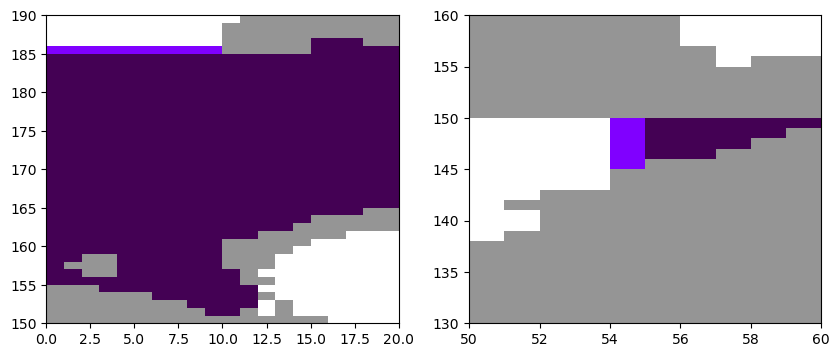

In [45]:
# let's make the mask even smaller such that we only have two gates
fig = plt.figure()

ax = plt.subplot(121)
ax.pcolormesh(mymsk)
ax.pcolormesh(landmsk,cmap="Greys",vmin=-2,vmax=4)
mymsk2 = mymsk.copy()
mymsk2[:185,:] = np.nan
mymsk2[:,10:] = np.nan
ax.pcolormesh(mymsk2,cmap="rainbow")
ax.set_xlim(0,20)
ax.set_ylim(150,190)

ax = plt.subplot(122)
ax.pcolormesh(mymsk)
ax.pcolormesh(landmsk,cmap="Greys",vmin=-2,vmax=4)
mymsk2[140:155,54:55] = 1
mymsk2 *= hf1
mymsk2[mymsk2==0] = np.nan
ax.pcolormesh(mymsk2,cmap="rainbow")
ax.set_xlim(50,60)
ax.set_ylim(130,160)

In [46]:
mymsk_1d = mymsk2.reshape(orig_shape, order='C')

print(ind.shape, mymsk_1d.shape)  # both should be (40500,)

(40500,) (40500,)


In [47]:
# we can go ahead and define the xs and ys that we want to read from here
print(np.where(mymsk2 == 1))

#                           i indices              j indices
left_read = np.array([[54, 54, 54, 54, 54],[145, 146, 147, 148, 149]])          # where we read +ADVx_TH
right_read = np.array([[55, 55, 55, 55, 55],[145, 146, 147, 148, 149]])         # where we read -ADVx_TH
top_read = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],[186, 186, 186, 186, 186, 186, 186, 186, 186, 186]])    # where we read -ADVy_TH
bot_read = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],[185, 185, 185, 185, 185, 185, 185, 185, 185, 185]])    # where we read +ADVy_TH

(array([145, 146, 147, 148, 149, 185, 185, 185, 185, 185, 185, 185, 185,
       185, 185]), array([54, 54, 54, 54, 54,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]))


In [48]:
mymsk_1dtile = np.tile(mymsk_1d[np.newaxis,:],(nT-1,1))
hf2dtile.shape

(111, 40500)

In [49]:
# load the G_T terms again with the mask in mind
# this will be a width 1 list

# make the G_T term
G_T = {}
G_T["all"] = {}
    
# now loop through
G_T["all"][ts] = {}
for i in range(len(ifldT)-1, -1, -1):
    tmp = read_float64_skip(layers_path + "diags/LAYERS/layers_3d_Ttend." + tsstr[-1] + ".data", nx*ny*(nT-1),ifldT[i])
    tmp = np.reshape(tmp,(nT-1,nx*ny))

    # here we will want to multiply by the mask for the Barents Sea
    tmp = tmp * mymsk_1dtile * (rac2dtile * hf2dtile) #* ffac

    if i == ifldT.shape[0]-1:
        # if LTto2TH, do not remove from residual
        residT = tmp
    else:
        # else if vADV, hADV, vDiff, hDiff, surface, remove from residual
        residT = residT-tmp
    
    # just do the Barents Sea for this one
    a = np.nansum(tmp,axis=1)
    G_T["all"][ts][setTtend[ifldT[i]]] = a

G_T["all"][ts]["residT"] = np.nansum(residT,axis=1)

Text(0, 0.5, 'G_T ADVr m^3/s')

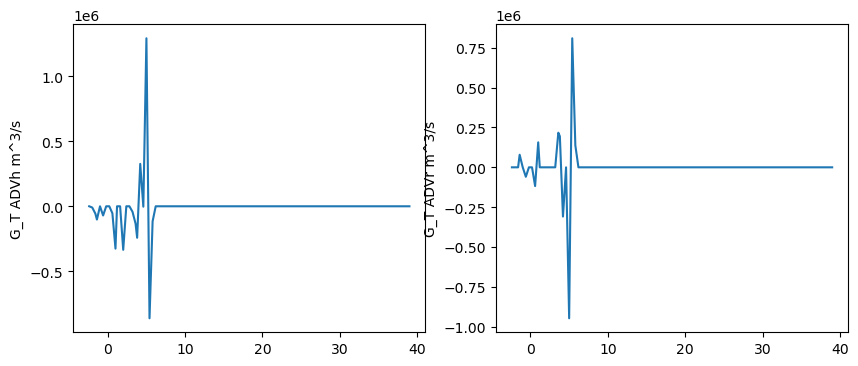

In [50]:
# plot this as a line graph with the T bins
GADVh = G_T["all"][ts]['LTha2TH']
GADVr = G_T["all"][ts]['LTza2TH']

fig = plt.figure()

ax = plt.subplot(121)
ax.plot(boundsT.flatten()[1:-1],GADVh)
ax.set_ylabel("G_T ADVh m^3/s")


ax = plt.subplot(122)
ax.plot(boundsT.flatten()[1:-1],GADVr)
ax.set_ylabel("G_T ADVr m^3/s")

In [51]:
# now compare this to the overall ADV convergence (these will match)

# we first need to multiply the ADVh and ADVr by the mask we just made
ADVh_small = ADVh * np.tile(mymsk2[np.newaxis,:,:],(nz,1,1))
ADVr_small = ADVr * np.tile(mymsk2[np.newaxis,:,:],(nz,1,1))
ADVh_small[np.isnan(ADVh_small)] = 0
ADVr_small[np.isnan(ADVr_small)] = 0

# ADVh_small

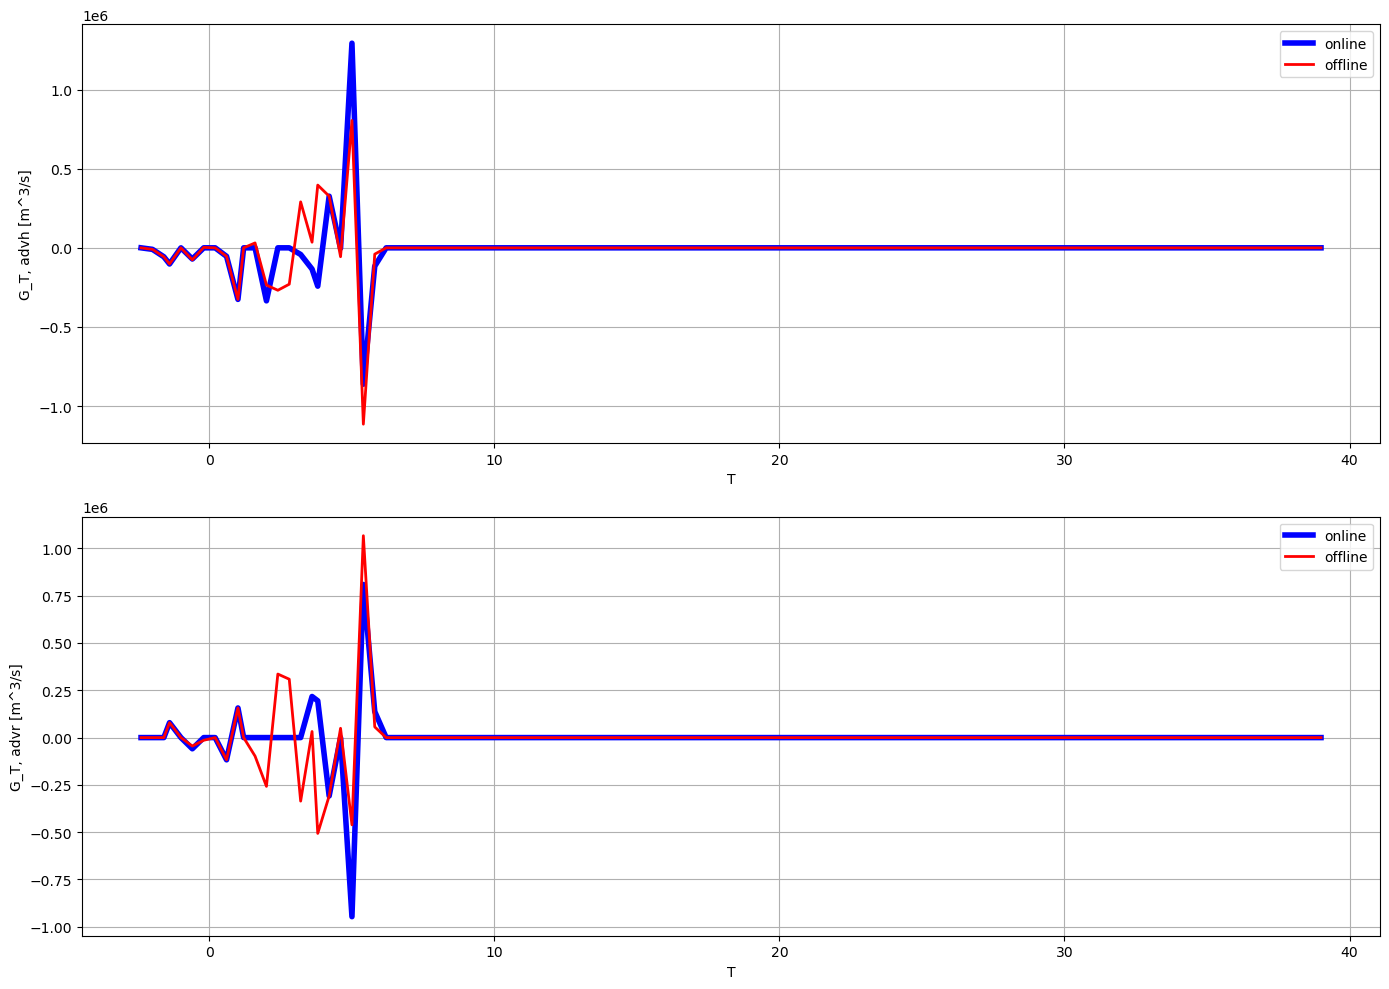

In [52]:
plot_figure4_new(THETA, ADVh_small, ADVr_small, boundsT.flatten(), binmidT.flatten(), binwidthT1,
                               GADVh, GADVr, iiT=None)
plt.show()

In [53]:
binned_theta = bin_array(THETA, binsTH_edges).astype(float)
binned_theta[binned_theta == nT] = np.nan  # handle right-edge assignment
binned_theta[np.isnan(binned_theta)] = 0

## Let's also do this with the velocity fields to try and make sense of this

In [54]:
# # create the volume and bin this
# DXG3d = np.tile(mygrid['DXG'][np.newaxis,:,:],(nz,1,1))
# DYG3d = np.tile(mygrid['DYG'][np.newaxis,:,:],(nz,1,1))
# DRF3d = np.tile(mygrid['DRF'][:,np.newaxis,np.newaxis],(1,ny,nx))

# # grab the UVEL and VVEL for this timestep
# file_name = "budg3d_hflux_set2"
# meta_budg3d_hflux_set2 = parsemeta(dirdiags + file_name + "." + tsstr[0] + ".meta")
# fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
# varnames = np.array(["UVELMASS","VVELMASS"])
# recs = np.array([])
# for var in varnames:
#     irec = np.where(fldlist == var)
#     recs = np.append(recs, irec[0][0])
# UVELMASS,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[0])
# VVELMASS,its,meta = rdmds(os.path.join(dirdiags, file_name),t2,returnmeta=True,rec=recs[1])  # m/s
# UVELMASS = UVELMASS.reshape(nz,ny,nx)
# VVELMASS = VVELMASS.reshape(nz,ny,nx)


# # create the same gateways as we do below with UVELMASS and VVELMASS
# VEL_gates = {}

# VEL_west = np.zeros((nz,ny,nx))
# for j,i, in zip(left_read[1],left_read[0]):
#     VEL_west[:,j,i] += UVELMASS[:,j,i] * DYG3d[:,j,i] * DRF3d[:,j,i]
# for j,i, in zip(top_read[1],top_read[0]):
#     VEL_west[:,j-1,i] -= VVELMASS[:,j,i] * DXG3d[:,j,i] * DRF3d[:,j,i]
# VEL_gates["west"] = VEL_west

# VEL_east = np.zeros((nz,ny,nx))
# for j,i, in zip(right_read[1],right_read[0]):
#     VEL_east[:,j,i-1] -= UVELMASS[:,j,i] * DYG3d[:,j,i] * DRF3d[:,j,i]
# for j,i, in zip(bot_read[1],bot_read[0]):
#     VEL_east[:,j,i] += VVELMASS[:,j,i] * DXG3d[:,j,i] * DRF3d[:,j,i]
# VEL_gates["east"] = VEL_east


In [55]:
# # I think we could also do this with UVELMASS and VVELMASS to confirm it to ourselves

# # --- inputs & shapes ---
# THETA      = np.asarray(THETA)
# ADVw        = np.asarray(VEL_gates["west"])
# ADVe        = np.asarray(VEL_gates["east"])
# boundsT    = np.asarray(boundsT)
# binmidT    = np.asarray(binmidT)
# binwidthT1 = np.asarray(binwidthT1)      # length nT-1

# nT   = boundsT.size - 1
# nTm1 = nT - 1

# # x-locations for edge-based curves (length nTm1)
# x = boundsT[1:-1]

# # --- "new" interpretation: bin by binmidT intervals ---
# theta_flat = THETA.ravel()
# ADVw_flat   = ADVw.ravel()
# ADVe_flat   = ADVe.ravel()

# # binmidT[i] <= THETA < binmidT[i+1], i=0..nT-2
# bin_idx_mid = np.digitize(theta_flat, binmidT, right=False) - 1
# valid_mid   = (bin_idx_mid >= 0) & (bin_idx_mid < nTm1) & np.isfinite(theta_flat)
# idx_mid     = bin_idx_mid[valid_mid]

# # per-bin sums with NaN-propagation
# ADVw_flat_new = _bincount_sum_with_nan(idx_mid, ADVw_flat[valid_mid], nTm1)
# ADVe_flat_new = _bincount_sum_with_nan(idx_mid, ADVe_flat[valid_mid], nTm1)

# # not sure if I need to move these to the edges or if that would make a difference (An did it this way before)

# # edge-based G (m^3/s): divide by edge binwidths
# G_off_new_h = ADVw_flat_new #/ binwidthT1
# G_off_new_r = ADVe_flat_new #/ binwidthT1

In [56]:
# do for the BSO based on the y,x,and choose_UV
ADV_gates = {}

ADVx_TH = ADVx_TH.reshape((nz,ny,nx))
ADVy_TH = ADVy_TH.reshape((nz,ny,nx))


ADV_west = np.zeros((nz,ny,nx))
for j,i, in zip(left_read[1],left_read[0]):
    ADV_west[:,j,i] += ADVx_TH[:,j,i]
for j,i, in zip(top_read[1],top_read[0]):
    ADV_west[:,j-1,i] -= ADVy_TH[:,j,i]
ADV_gates["west"] = ADV_west

ADV_east = np.zeros((nz,ny,nx))
for j,i, in zip(right_read[1],right_read[0]):
    ADV_east[:,j,i-1] -= ADVx_TH[:,j,i]
for j,i, in zip(bot_read[1],bot_read[0]):
    ADV_east[:,j,i] += ADVy_TH[:,j,i]
ADV_gates["east"] = ADV_east

(0.0, 15.0)

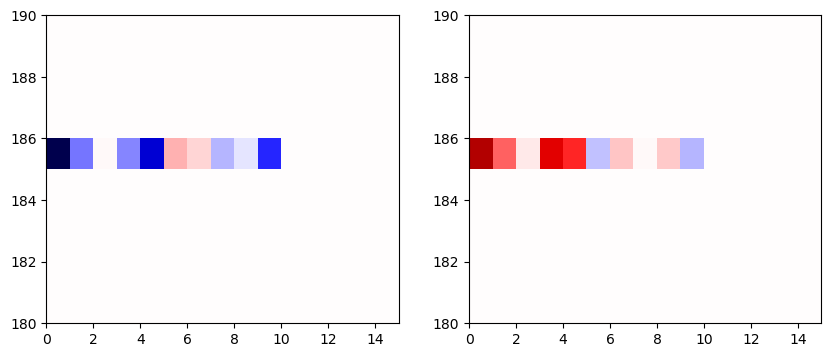

In [57]:
# let's make sure these are actually listed at the correct location
fig = plt.figure()

ax = plt.subplot(121)
ax.pcolormesh(ADV_gates["east"][0],cmap='seismic',vmin=-1e5,vmax=1e5)
ax.set_ylim(180,190)
ax.set_xlim(0,15)

ax = plt.subplot(122)
ax.pcolormesh(ADV_gates["west"][0],cmap='seismic',vmin=-1e5,vmax=1e5)
ax.set_ylim(180,190)
ax.set_xlim(0,15)

In [58]:
# create the gates we actually don't need to do this we can just copy the calculation we did before

In [59]:
# --- inputs & shapes ---
THETA      = np.asarray(THETA)
ADVw        = np.asarray(ADV_gates["west"])
ADVe        = np.asarray(ADV_gates["east"])
boundsT    = np.asarray(boundsT)
binmidT    = np.asarray(binmidT)
binwidthT1 = np.asarray(binwidthT1)      # length nT-1

nT   = boundsT.size - 1
nTm1 = nT - 1

# x-locations for edge-based curves (length nTm1)
x = boundsT[1:-1]

# --- "new" interpretation: bin by binmidT intervals ---
theta_flat = THETA.ravel()
ADVw_flat   = ADVw.ravel()
ADVe_flat   = ADVe.ravel()

# binmidT[i] <= THETA < binmidT[i+1], i=0..nT-2
bin_idx_mid = np.digitize(theta_flat, binmidT, right=False) - 1
valid_mid   = (bin_idx_mid >= 0) & (bin_idx_mid < nTm1) & np.isfinite(theta_flat)
idx_mid     = bin_idx_mid[valid_mid]

# per-bin sums with NaN-propagation
ADVw_flat_new = _bincount_sum_with_nan(idx_mid, ADVw_flat[valid_mid], nTm1)
ADVe_flat_new = _bincount_sum_with_nan(idx_mid, ADVe_flat[valid_mid], nTm1)

# not sure if I need to move these to the edges or if that would make a difference (An did it this way before)

# edge-based G (m^3/s): divide by edge binwidths
G_gateW_ADV = ADVw_flat_new / binwidthT1
G_gateE_ADV = ADVe_flat_new / binwidthT1

In [60]:
# we can do the same thing here with both the ADVh and ADVr terms from the convergence
THETA      = np.asarray(THETA)
ADVh        = np.asarray(ADVh_small)
ADVr        = np.asarray(ADVr_small)

nT   = boundsT.size - 1
nTm1 = nT - 1

# x-locations for edge-based curves (length nTm1)
x = boundsT[1:-1]

# --- "new" interpretation: bin by binmidT intervals ---
ADVh_flat   = ADVh.ravel()
ADVr_flat   = ADVr.ravel()

# binmidT[i] <= THETA < binmidT[i+1], i=0..nT-2
bin_idx_mid = np.digitize(theta_flat, binmidT, right=False) - 1
valid_mid   = (bin_idx_mid >= 0) & (bin_idx_mid < nTm1) & np.isfinite(theta_flat)
idx_mid     = bin_idx_mid[valid_mid]

# per-bin sums with NaN-propagation
ADVh_new = _bincount_sum_with_nan(idx_mid, ADVh_flat[valid_mid], nTm1)
ADVr_new = _bincount_sum_with_nan(idx_mid, ADVr_flat[valid_mid], nTm1)

# edge-based G (m^3/s): divide by edge binwidths
G_off_new_h_small = ADVh_new / binwidthT1
G_off_new_r_small = ADVr_new / binwidthT1

In [61]:
# I think we should try to do the averaging horizontally as An did in the beginning to see if this helps
# considering ADV gates is the same as our original ADV array, maybe we can try to do that here

Lij, adv_west_binned, adv_east_binned = bin_dF_by_theta(THETA, boundsT[:,0,0], ADV_gates["west"], ADV_gates["east"])


# --- Move to edges by averaging adjacent centers ---
ADV_TedgeWest = 0.5 * (adv_west_binned[:-1] + adv_west_binned[1:])   # move to the edge beceause this is already an integral
G_T_offlineWest = ADV_TedgeWest / binwidthT1
ADV_TedgeEast = 0.5 * (adv_east_binned[:-1] + adv_east_binned[1:])   # move to the edge beceause this is already an integral
G_T_offlineEast = ADV_TedgeEast / binwidthT1

(-4.470000100135803,
 41.070000004768374,
 -3142069.0573935737,
 5729154.833208703)

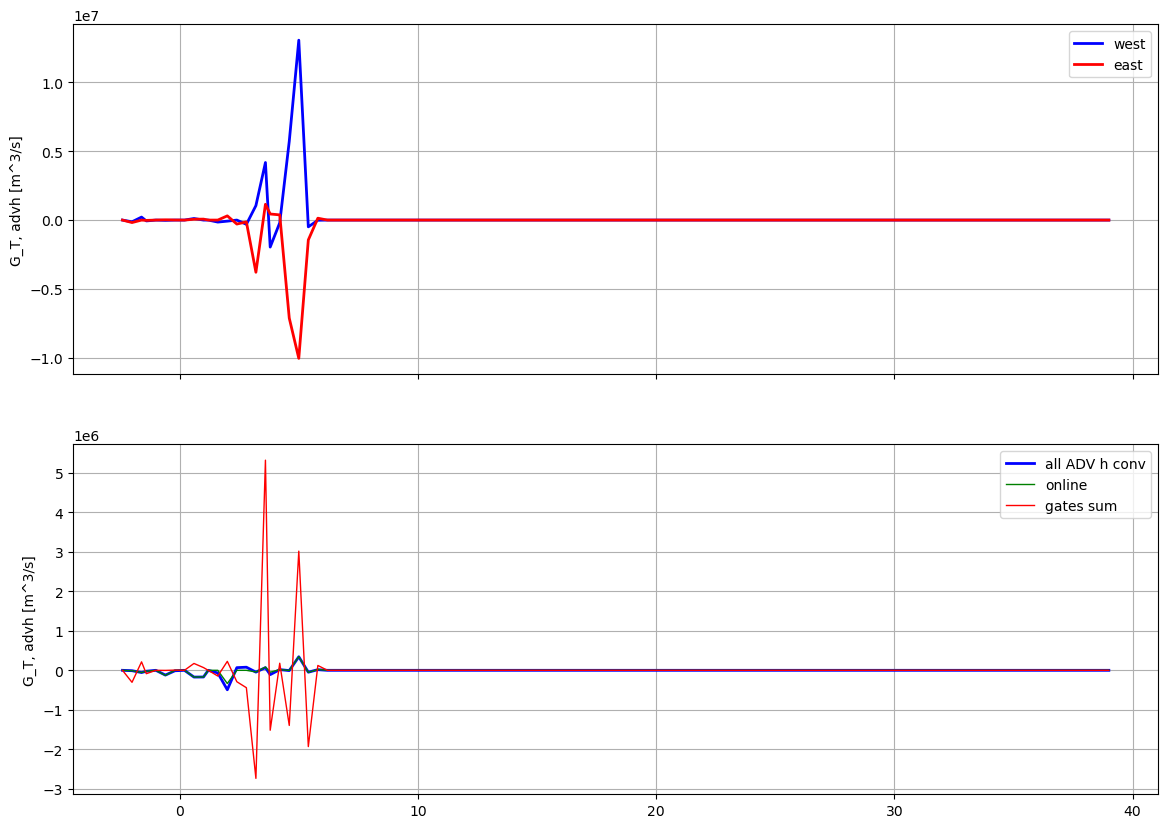

In [62]:
# selection
iiT = slice(None)

# --- plot: 2 rows, 1 column ---
fig, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top: advh (west/east)
ax_top.plot(boundsT.flatten()[1:-1], G_gateW_ADV[iiT], 'b-', linewidth=2, label='west')
ax_top.plot(boundsT.flatten()[1:-1], G_gateE_ADV[iiT], 'r-', linewidth=2, label='east')
ax_top.grid(True)
ax_top.set_ylabel('G_T, advh [m^3/s]')
ax_top.legend()
ax_top.axis('tight')

ax_bot.plot(boundsT.flatten()[1:-1], G_off_new_h_small[iiT] + G_off_new_r_small[iiT], 'b-', linewidth=2, label='all ADV h conv')
ax_bot.plot(boundsT.flatten()[1:-1], GADVh[iiT] + GADVr[iiT], 'g-', linewidth=1, label='online')
ax_bot.plot(boundsT.flatten()[1:-1], G_gateW_ADV[iiT] + G_gateE_ADV[iiT], 'r-', linewidth=1, label='gates sum')
ax_bot.grid(True)
ax_bot.set_ylabel('G_T, advh [m^3/s]')
ax_bot.legend()
ax_bot.axis('tight')

(-4.470000100135803, 41.070000004768374, -2899118.680890282, 2805430.128972103)

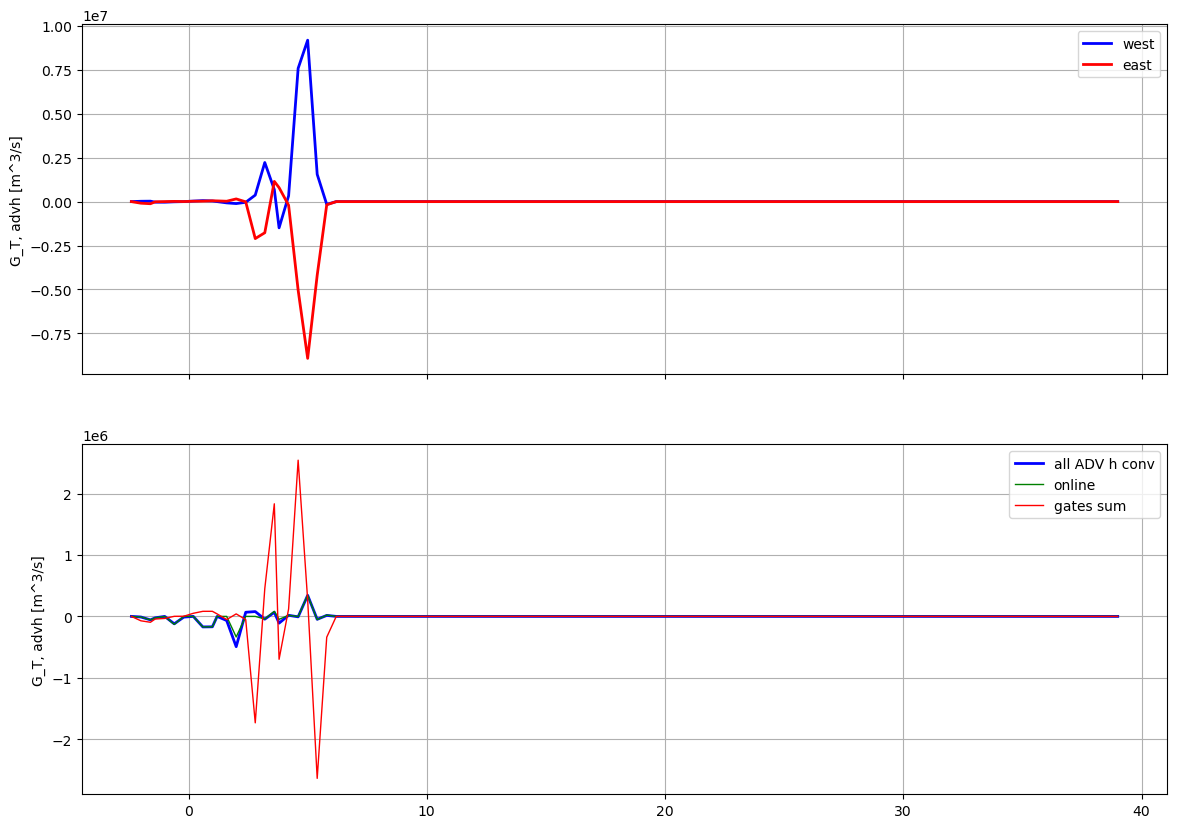

In [63]:
# selection
iiT = slice(None)

# --- plot: 2 rows, 1 column ---
fig, (ax_top, ax_bot) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# G_T_offlineWest
# G_T_offlineEast

# Top: advh (west/east)
ax_top.plot(boundsT.flatten()[1:-1], G_T_offlineWest[iiT], 'b-', linewidth=2, label='west')
ax_top.plot(boundsT.flatten()[1:-1], G_T_offlineEast[iiT], 'r-', linewidth=2, label='east')
ax_top.grid(True)
ax_top.set_ylabel('G_T, advh [m^3/s]')
ax_top.legend()
ax_top.axis('tight')

ax_bot.plot(boundsT.flatten()[1:-1], G_off_new_h_small[iiT] + G_off_new_r_small[iiT], 'b-', linewidth=2, label='all ADV h conv')
ax_bot.plot(boundsT.flatten()[1:-1], GADVh[iiT] + GADVr[iiT], 'g-', linewidth=1, label='online')
ax_bot.plot(boundsT.flatten()[1:-1], G_T_offlineWest[iiT] + G_T_offlineEast[iiT], 'r-', linewidth=1, label='gates sum')
ax_bot.grid(True)
ax_bot.set_ylabel('G_T, advh [m^3/s]')
ax_bot.legend()
ax_bot.axis('tight')

In [152]:
# but not sure if the total ADV conv should be the same as Gterms from ADVh and ADVr? I think so
# because the gates are not just contributing to the H conv right, they are also contributing to the vertical convergence

# plot the overall sums of the the online and offline gateway terms here

In [153]:
# do the manual calculation of the gateways, the ADVr + ADVh convergences